#### Data Preprocessing:

In [1]:
import pandas as pd

df = pd.read_excel(r"C:\Users\Parvathy Shine\Desktop\Assignments\8. Clustering (1)\Clustering\EastWestAirlines.xlsx",sheet_name='data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [2]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe() # Understand overall info about the data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 1198.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
df.describe().T

count          mean            std  min      25%      50%  \
ID#                3999.0   2014.819455    1160.764358  1.0   1010.5   2016.0   
Balance            3999.0  73601.327582  100775.664958  0.0  18527.5  43097.0   
Qual_miles         3999.0    144.114529     773.663804  0.0      0.0      0.0   
cc1_miles          3999.0      2.059515       1.376919  1.0      1.0      1.0   
cc2_miles          3999.0      1.014504       0.147650  1.0      1.0      1.0   
cc3_miles          3999.0      1.012253       0.195241  1.0      1.0      1.0   
Bonus_miles        3999.0  17144.846212   24150.967826  0.0   1250.0   7171.0   
Bonus_trans        3999.0     11.601900       9.603810  0.0      3.0     12.0   
Flight_miles_12mo  3999.0    460.055764    1400.209171  0.0      0.0      0.0   
Flight_trans_12    3999.0      1.373593       3.793172  0.0      0.0      0.0   
Days_since_enroll  3999.0   4118.559390    2065.134540  2.0   2330.0   4096.0   
Award?             3999.0      0.370343       0.482957  0.0      0.0      0.0   

                       75%        max  
ID#                 3020.5     4021.0  
Balance            92404.0  1704838.0  
Qual_miles             0.0    11148.0  
cc1_miles              3.0        5.0  
cc2_miles              1.0        3.0  
cc3_miles              1.0        5.0  
Bonus_miles        23800.5   263685.0  
Bonus_trans           17.0       86.0  
Flight_miles_12mo    311.0    30817.0  
Flight_trans_12        1.0       53.0  
Days_since_enroll   5790.5     8296.0  
Award?                 1.0        1.0

In [5]:
df.info() # All are numerical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.isnull().sum() # No missing values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.drop("ID#",axis=1,inplace=True)

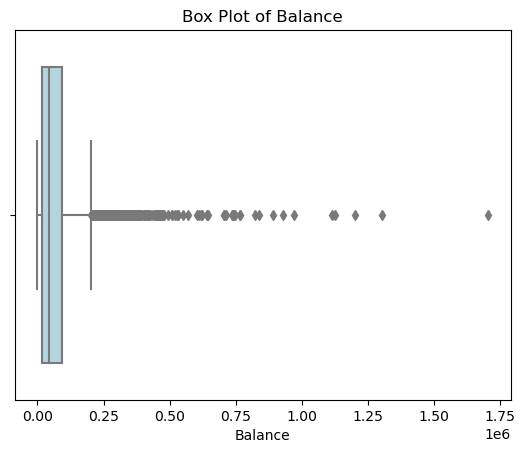

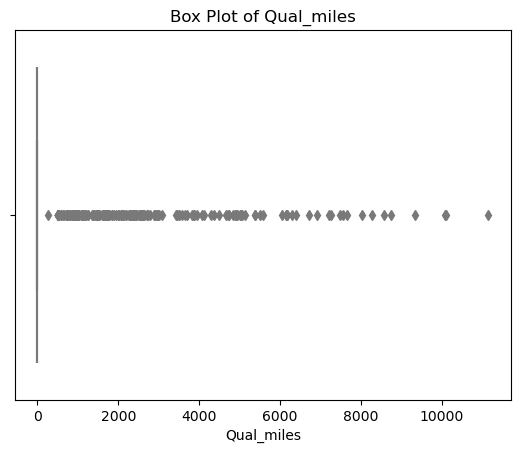

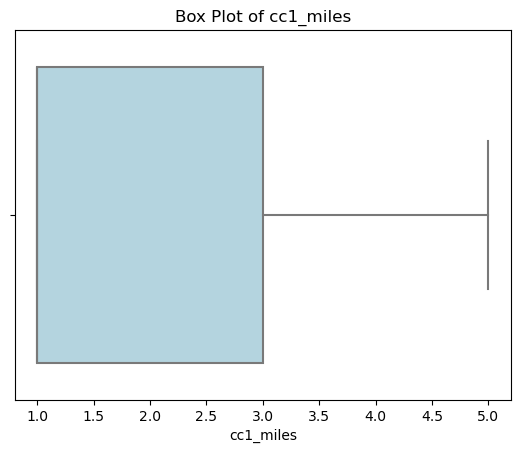

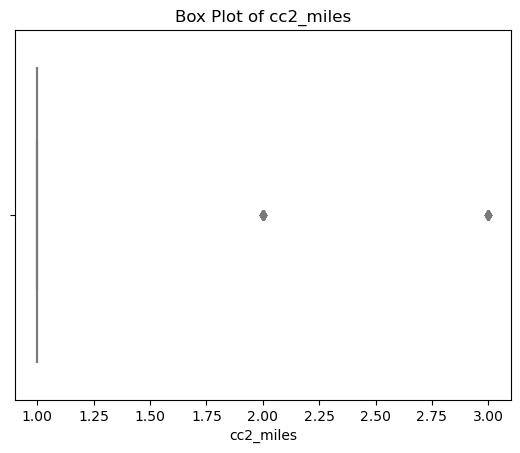

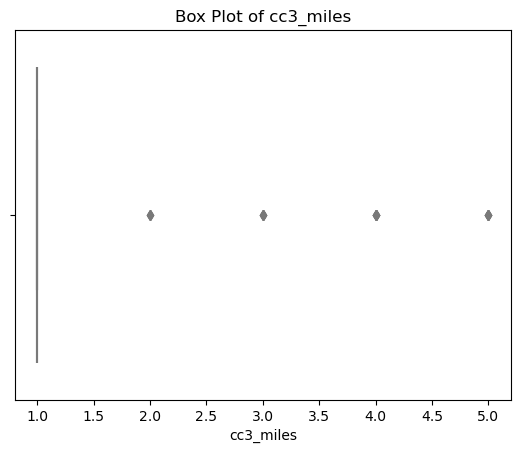

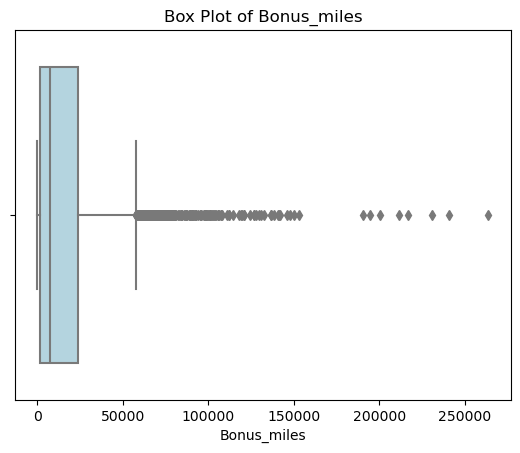

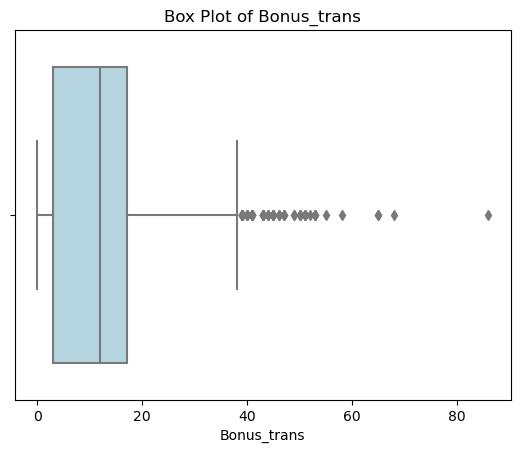

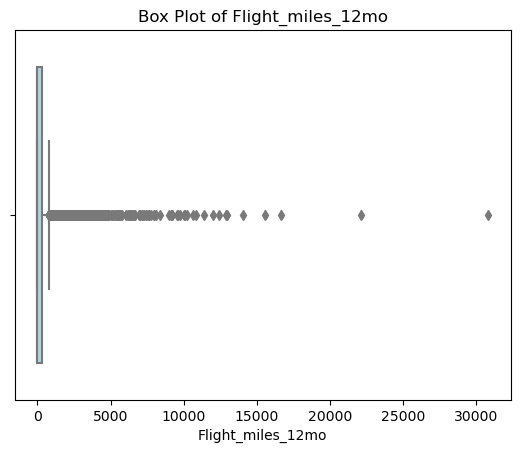

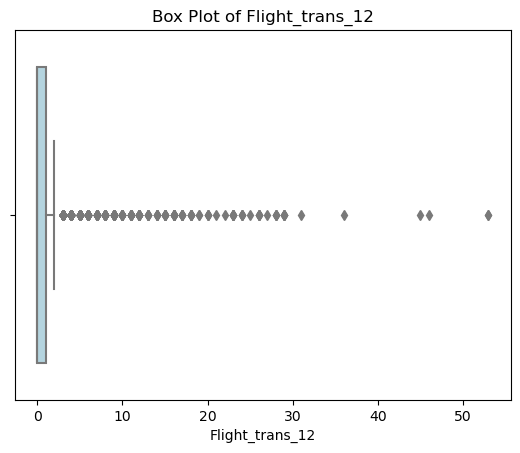

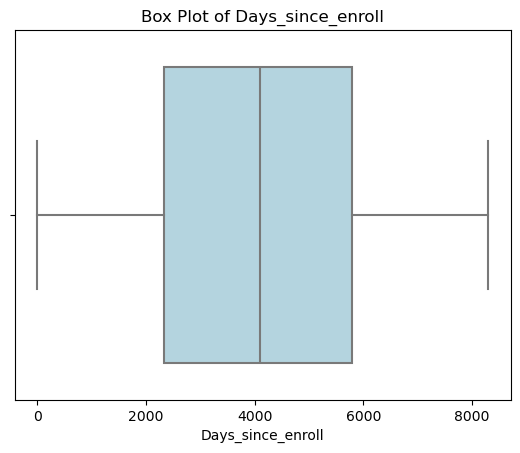

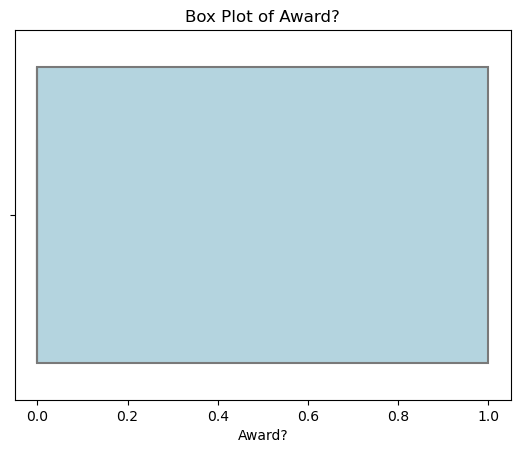

In [8]:
# Data preprocessing 
#Plotting boxplot for numeircal values (here everything is numerical)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Visualise outliers with help  of Boxplot
num_cols= df.select_dtypes(include='int64').columns
for col in num_cols:
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Outliers detected in 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'.

<Axes: >

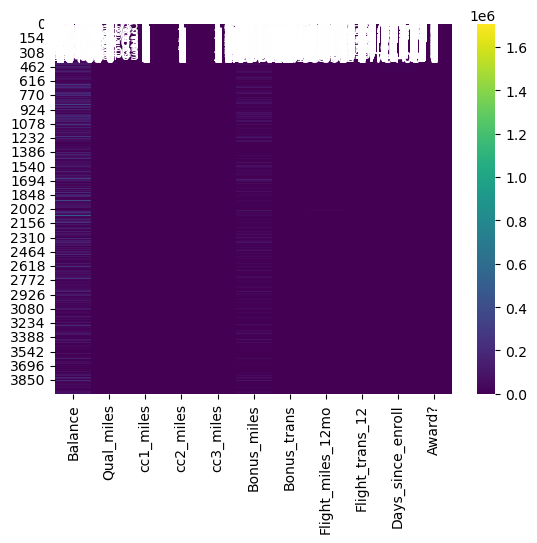

In [9]:
import seaborn as sns
z=df.corr()
sns.heatmap(df,annot=True,cmap='viridis')

# It is evident that 
#1.Balance positive correlation Bonus_miles and Bonus_trans
#2.Flight_miles_12mo is highly overall correlated with Flight_trans_12
#3.cc1_miles is highly overall correlated with Bonus_miles

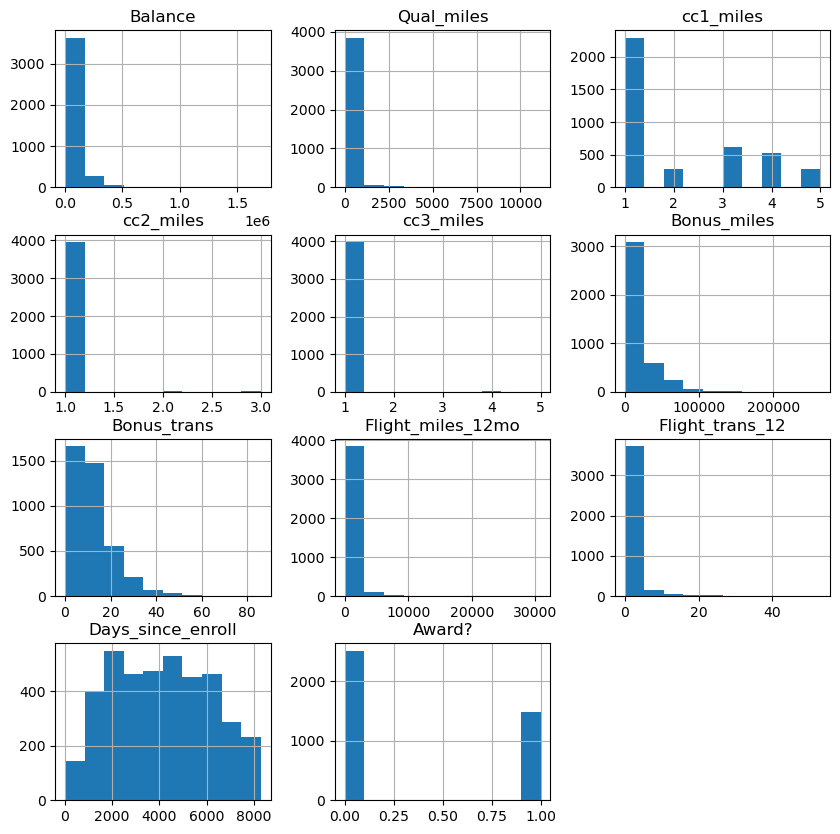

In [10]:
# Histogram to understand about the overall distribution of values 

df.hist(figsize=(10,10));

# All are skewed, Using IQR method for handling the Outliers 

In [11]:
# IQR Method:

num_cols= df.select_dtypes(include='int64').columns
for col in num_cols:
    Q1 = df[col].quantile(.25) #Q1 = 25%
    Q3 = df[col].quantile(.75) #Q3 = 75%
    IQR = Q3 - Q1              #Interquartile Range
    lower_limit= Q1 - 1.5*IQR  # setting upper limit and lower limit on normal values 
    upper_limit= Q3 + 1.5*IQR
df[col] = df[col].clip(lower=lower_limit,upper=upper_limit) # Fixing outlier by capping them to limit values 

In [12]:
# Scaling Features: Transforming numerical data into a standardized range to ensure that all features contribute equally to a model.

# Standard Scalar:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ds = scaler.fit_transform(df) # ds=data scaled


C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


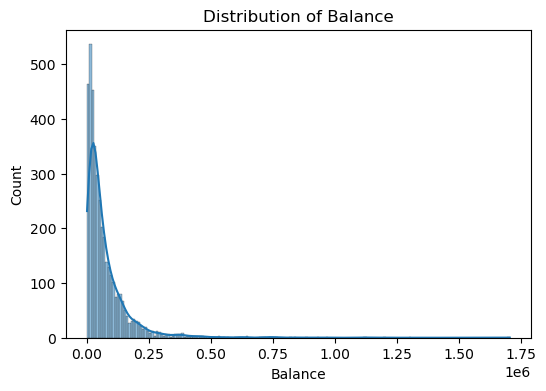

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


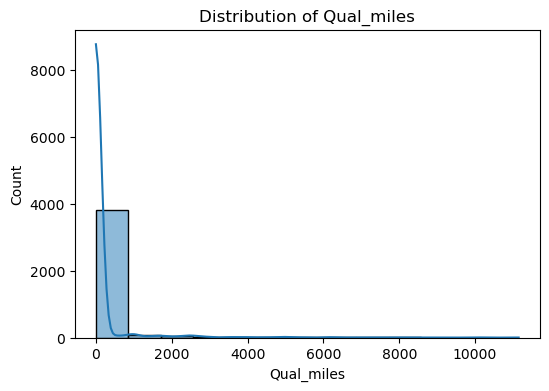

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


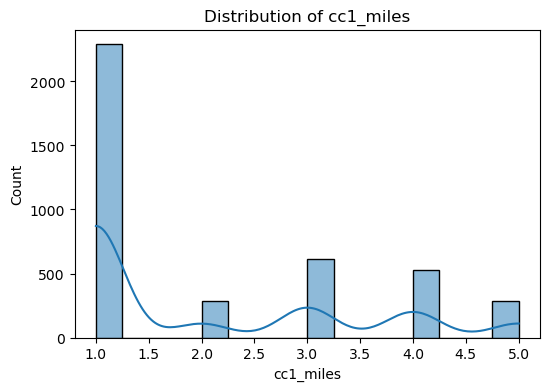

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


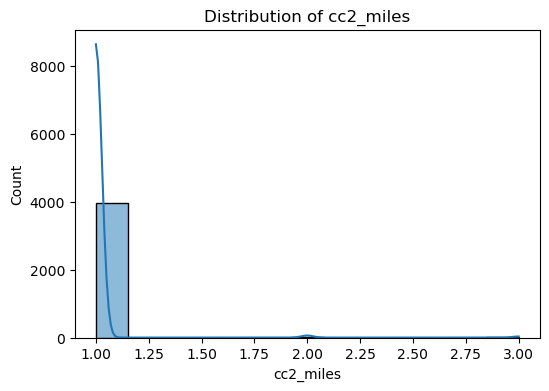

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


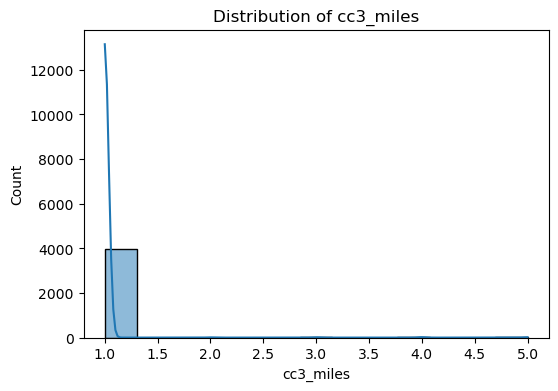

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


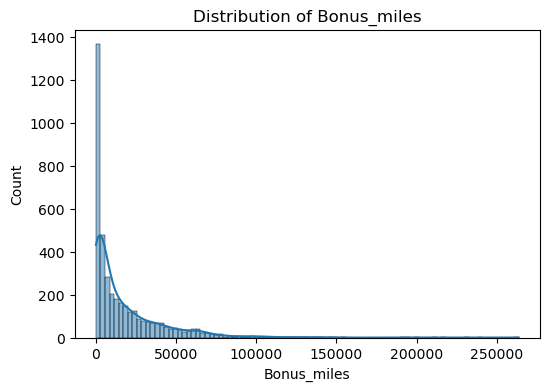

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


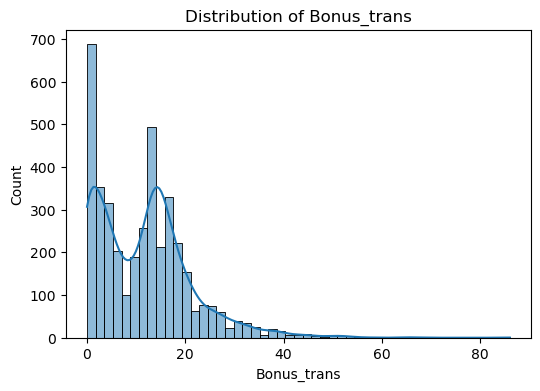

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


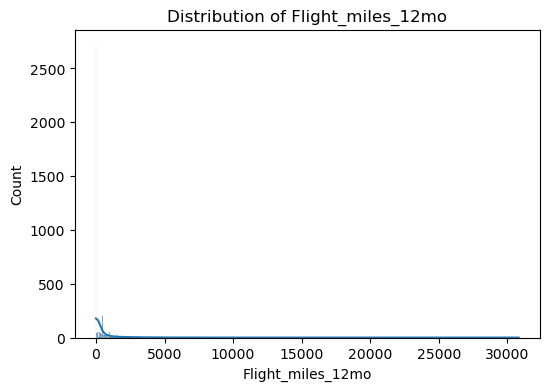

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


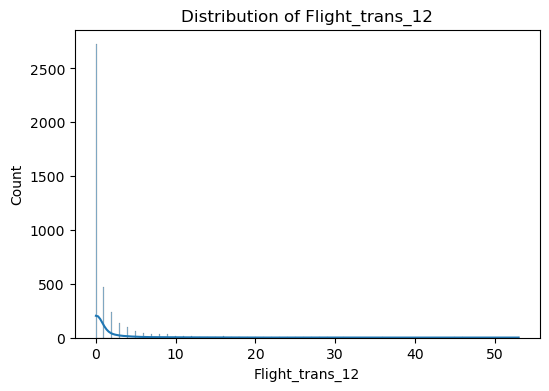

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


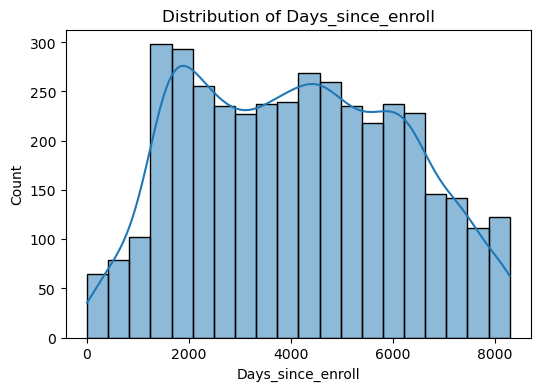

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


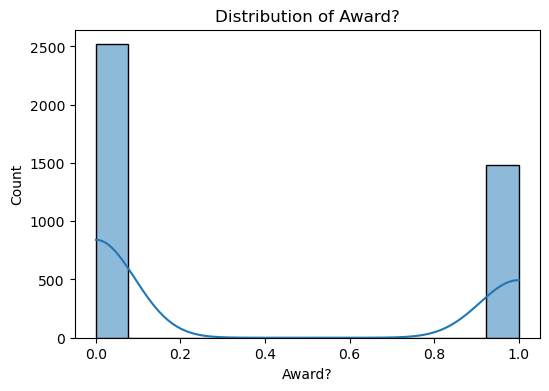

In [13]:
import seaborn as sns

for col in df:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#'Balance', 'Bonus_miles' is right-skewed
#'Flight_miles_12mo' has 0 values
#'Days_since_enroll' normal distribution

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


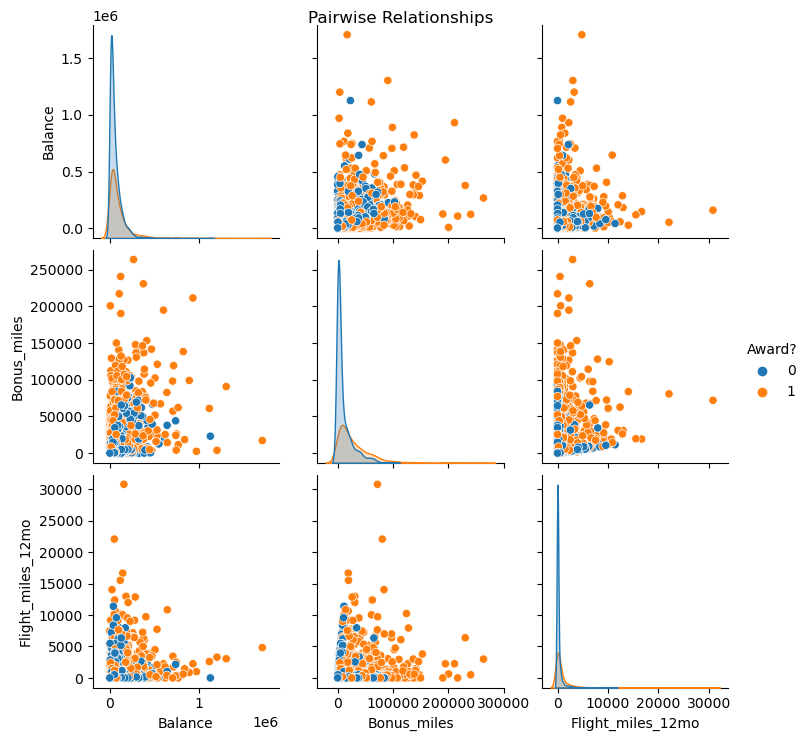

In [14]:
p = df[['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Award?']]
sns.pairplot(p, hue='Award?', diag_kind='kde')
plt.suptitle("Pairwise Relationships")
plt.show()
# to find pairwise relationship

## Implementing Clustering Algorithms:

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(
C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans i

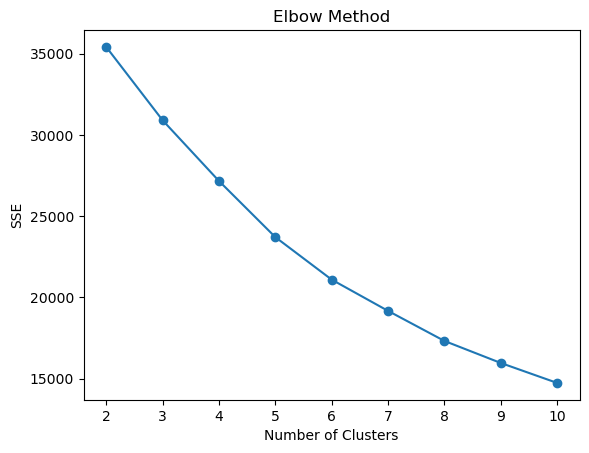

In [15]:
# 1. Implementing K-means

# Finding which cluster is the best using Elbow method:

from sklearn.cluster import KMeans
sse= [] # Creating an empty list .... [sum of squared errors]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42,n_init=10)
    kmeans.fit(ds)
    sse.append(kmeans.inertia_)

#Now Plotting to understand which to use

plt.plot(range(2, 11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
# 3 looks good

In [16]:
# Final K-Means with chosen K
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)

# Cluster labels
labels_kmeans = kmeans.fit_predict(ds) #Labels

C:\Users\Parvathy Shine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


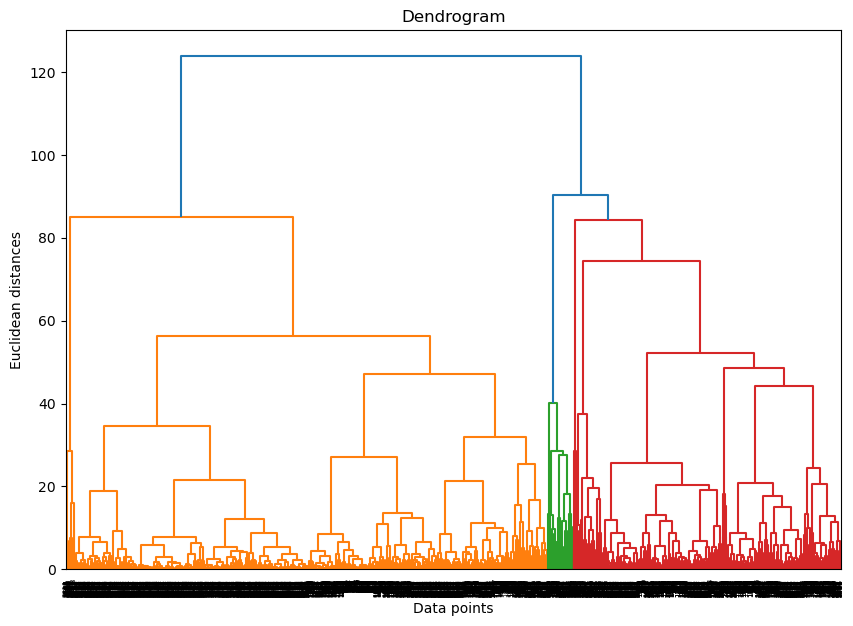

In [17]:
# 2. Hierarchial Clustering : find the cluster of all the relationship with each

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#Creating dendogram to choose the number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(ds, method='ward'))  # 'ward' minimizes variance

plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

#Intuitively taking 4 clusters from the diagram  (3 or 4 looks ideal)

In [18]:
# Applying the heirarchial clustering :
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(ds) #Lables

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=10)  
dbscan_labels = dbscan.fit_predict(ds) #Label

### Cluster Analysis and Interpretation:

In [20]:
original_column_names = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
                         'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
                         'Days_since_enroll', 'Award?']

# Convert scaled data to a DataFrame
scaled_df = pd.DataFrame(ds, columns=original_column_names)

# KMeans
df['KMeans_Cluster'] = labels_kmeans
print("=== KMeans Clusters on Scaled Data ===")
print(scaled_df.groupby(labels_kmeans).mean())

# Hierarchical Clustering
df['Hierarchical_Cluster'] = hc_labels
print("=== Hierarchical Clusters on Scaled Data ===")
print(scaled_df.groupby(hc_labels).mean())

# DBSCAN
df['DBSCAN_Cluster'] = dbscan_labels
print("=== DBSCAN Clusters on Scaled Data ===")
print(scaled_df.groupby(dbscan_labels).mean())

=== KMeans Clusters on Scaled Data ===
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.430489    0.016425   1.214470  -0.082101   0.112188     0.963756   
1  1.233309    0.823170   0.066161   0.146587   0.091526     0.597053   
2 -0.290099   -0.061121  -0.598291   0.030704  -0.060776    -0.509899   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     0.766290          -0.083999        -0.095362           0.370982   
1     1.610434           3.509591         3.778636           0.296124   
2    -0.478668          -0.185251        -0.197045          -0.200553   

     Award?  
0  0.585129  
1  0.904721  
2 -0.344546  
=== Hierarchical Clusters on Scaled Data ===
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.423897    0.284041   1.045243  -0.098242   0.119120     0.828456   
1 -0.270655   -0.174627  -0.592297  -0.098242  -0.062767    -0.508397   
2  0.608155    0.322155   0.269661  -0.098242  -0.06276

### Insights :

<br>What this scaled data mean
<br>Values > 0 → Above average 
<br>Values < 0 → Below average
<br>Values >> 1 → Strong characteristic
<br>Values ≈ 0 → Average behavior

Kmeans: 3 clusters (which we specified)
<br>0 - Above average - High enagement users
<br>1 - Above average - high awards , probably travel more
<br>2 - negetive - no awards at all , someone who dont use the servives often

Heirarchial : 4 clusters
<br>0 - Moderate users
<br>1 - Inactive users
<br>2 - Best Users
<br>3 - Moderate users

DBSCAN : 4 cluster(auto-identified)
<br>-1 - high in everything 
<br>0 - Inactive users
<br>1 - Best users
<br>2 - -ve awards 

### Visualization:

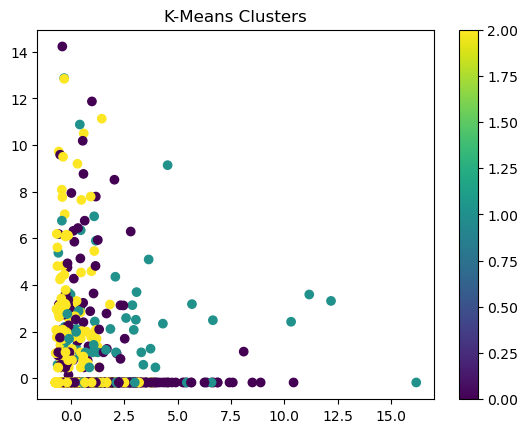

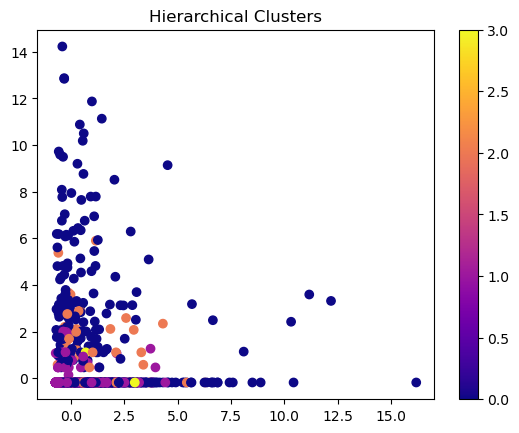

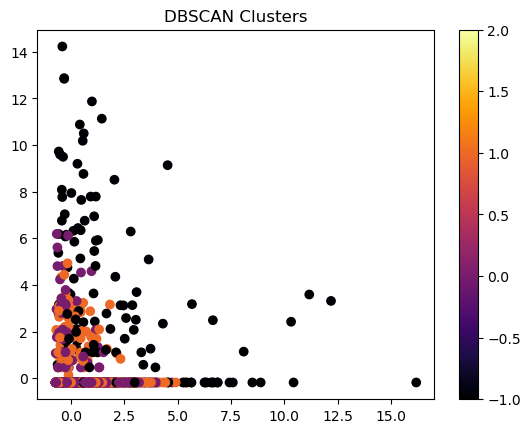

In [21]:
# Visualize the K-Means clusters

plt.scatter(ds[:, 0], ds[:, 1], c=labels_kmeans, cmap='viridis') # c- used cluster labels to color data points
plt.title('K-Means Clusters')
plt.colorbar() #Idenitfy which color belong to which cluster
plt.show()

# Visualize the Hierarchical Clusters

plt.scatter(ds[:, 0], ds[:, 1], c=hc_labels,cmap='plasma')
plt.title('Hierarchical Clusters')
plt.colorbar()
plt.show()

# Visualize the DBSCAN Clusters

plt.scatter(ds[:, 0], ds[:, 1], c=dbscan_labels,cmap='inferno')
plt.title('DBSCAN Clusters')
plt.colorbar()
plt.show() 

In [22]:
# Calculate the silhouette score for each clustering algorithm
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for K-Means, Hierarchical, and DBSCAN
kmeans_score = silhouette_score(ds, labels_kmeans)
hierarchical_score = silhouette_score(ds, hc_labels)
dbscan_score = silhouette_score(ds, dbscan_labels)

print("K-Means Silhouette Score:", kmeans_score)
print("Hierarchical Silhouette Score:", hierarchical_score)
print("DBSCAN Silhouette Score:", dbscan_score)

K-Means Silhouette Score: 0.31120106054803415
Hierarchical Silhouette Score: 0.30814152852022786
DBSCAN Silhouette Score: 0.25546923305422986


#### Insights: Kmeans > Heirarchial > DBSCAN 
<br>Kmeans has done the best clustering